In [1]:
# Course: INF 2178: Experimental Design For Data Science
# Name: Charlie Zhang
# Student number：1009855514
# Instructor: Shion Guha
# Program: Master of Information
# University of Toronto
# Assignment 4

In [2]:
import pandas as pd
from scipy.stats import shapiro, levene
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import multipletests

In [3]:
# Load the dataset and display the first few rows
dt = pd.read_csv('INF2178_A4_data.csv')

# Prepare a copy of dataset
dt_copy = dt.copy()

# Display the first few rows
dt.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [4]:
# Check the data type and if there is missing values
dt.info()  # Missing value found in SES and MMSE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


In [5]:
# Summary of the dataset
dt_summary = dt.describe()
dt_summary

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,190.421769,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,371.000000,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# **EDA**#

In [6]:
# Handling missing values
# For simplicity, we'll fill missing SES values with the median of SES, and MMSE with its median as well
dt['SES'].fillna(dt['SES'].median(), inplace=True)
dt['MMSE'].fillna(dt['MMSE'].median(), inplace=True)

In [7]:
# Check if there are missing values still
dt.isnull().sum() # No missing value found!

Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

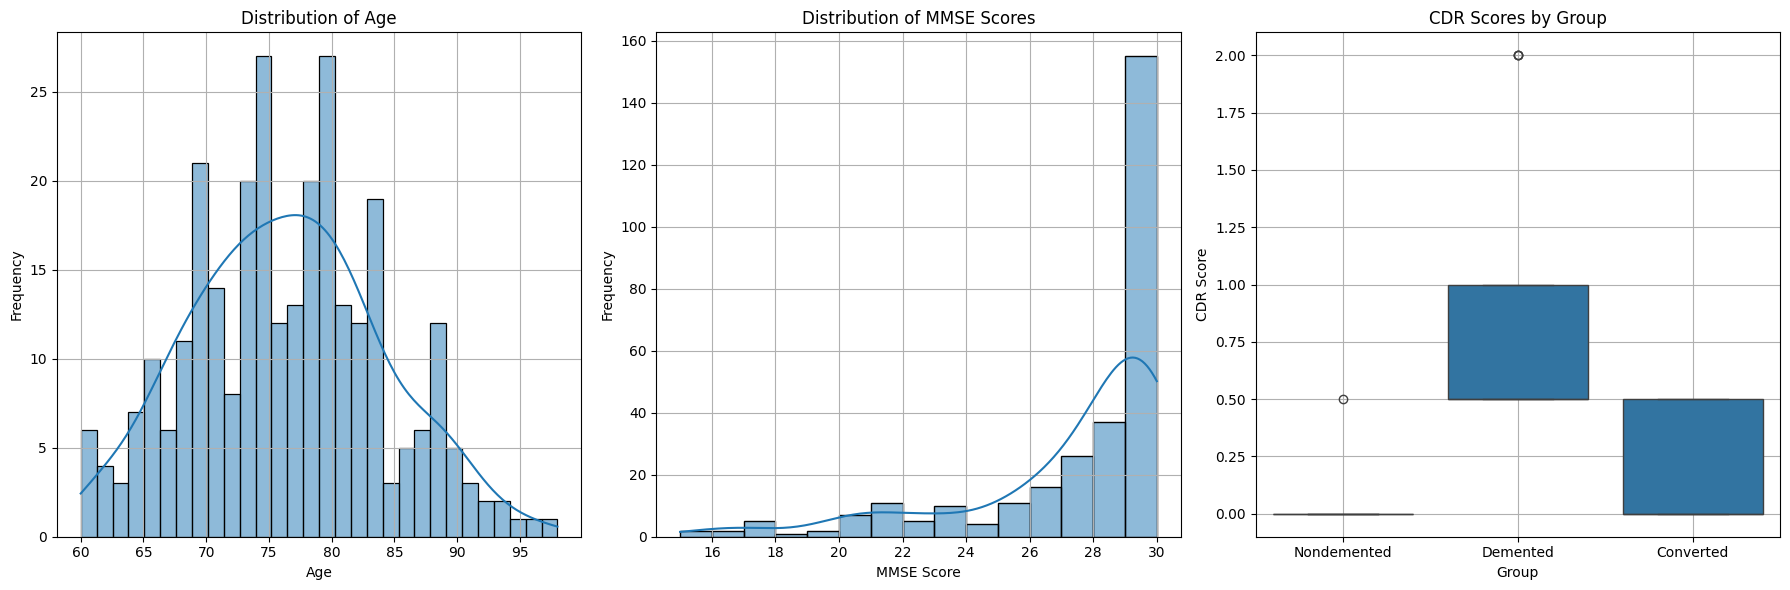

In [8]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribution of Age
sns.histplot(dt['Age'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution of MMSE scores
sns.histplot(dt['MMSE'], kde=True, bins=15, ax=axes[1])
axes[1].set_title('Distribution of MMSE Scores')
axes[1].set_xlabel('MMSE Score')
axes[1].set_ylabel('Frequency')

# CDR scores by Group
sns.boxplot(x='Group', y='CDR', data=dt, ax=axes[2])
axes[2].set_title('CDR Scores by Group')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('CDR Score')

# Add grid
for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()

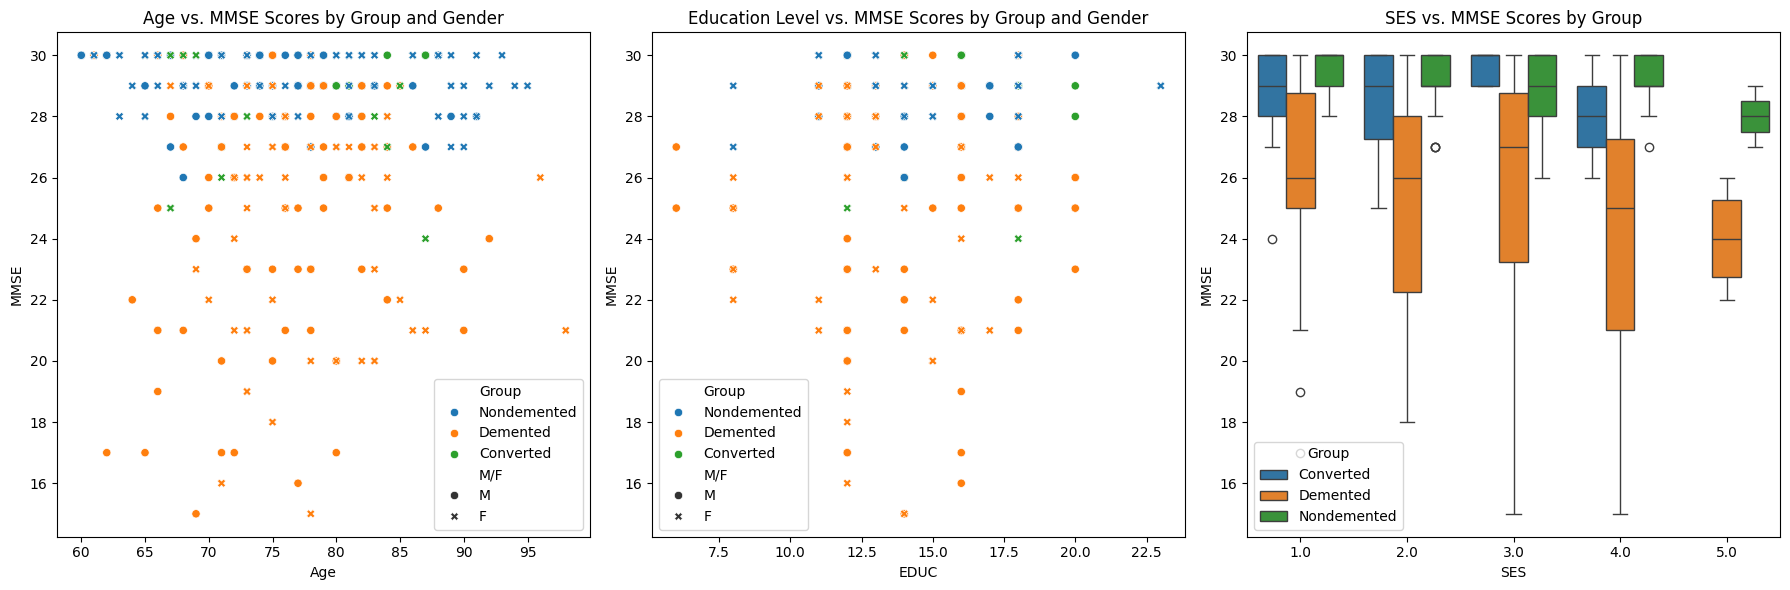

In [9]:
# Create subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribution of Age and MMSE Scores by Group and Gender
sns.scatterplot(x='Age', y='MMSE', hue='Group', style='M/F', data=dt, ax=axes[0])
axes[0].set_title('Age vs. MMSE Scores by Group and Gender')

# Education Level and MMSE Scores by Group and Gender
sns.scatterplot(x='EDUC', y='MMSE', hue='Group', style='M/F', data=dt, ax=axes[1])
axes[1].set_title('Education Level vs. MMSE Scores by Group and Gender')

# Socioeconomic Status (SES) and MMSE Scores by Group
sns.boxplot(x='SES', y='MMSE', hue='Group', data=dt, ax=axes[2])
axes[2].set_title('SES vs. MMSE Scores by Group')

plt.tight_layout()
plt.show()

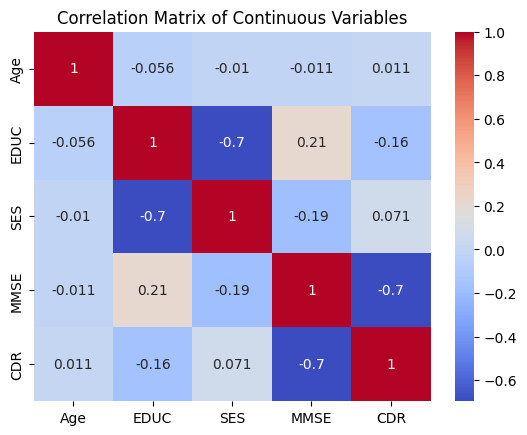

In [10]:
# For understanding relationships between all continuous variables, especially to see how age, education (EDUC),
# and socioeconomic status (SES) relate to MMSE and CDR scores.
corr_matrix = dt[['Age', 'EDUC', 'SES', 'MMSE', 'CDR']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()


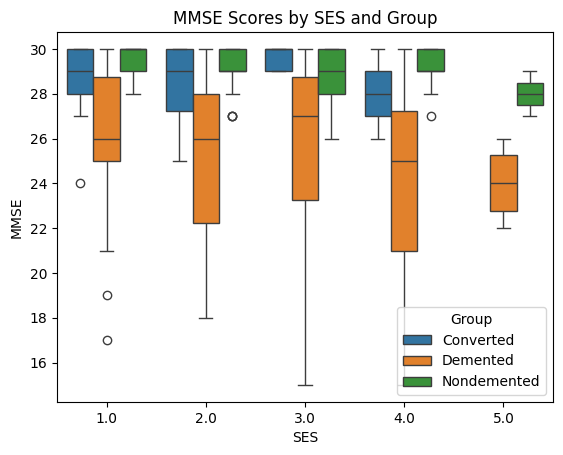

In [11]:
# To examine the distribution of MMSE and CDR scores across different levels of SES or education within each dementia group.
sns.boxplot(x='SES', y='MMSE', hue='Group', data=dt)
plt.title('MMSE Scores by SES and Group')
plt.show()


#**Mixed Effects Analysis**#

#**Q1**#
**How do cognitive scores, as measured by the Mini-Mental State Examination (MMSE) and the Clinical Dementia Rating (CDR), change over time in individuals diagnosed with dementia compared to those without dementia, accounting for individual variability?**

H0: There is no significant difference in cognitive score changes over time between individuals with and without dementia, after considering individual variability.

H1: There is a significant difference in cognitive score changes over time between individuals with and without dementia, after considering individual variability.

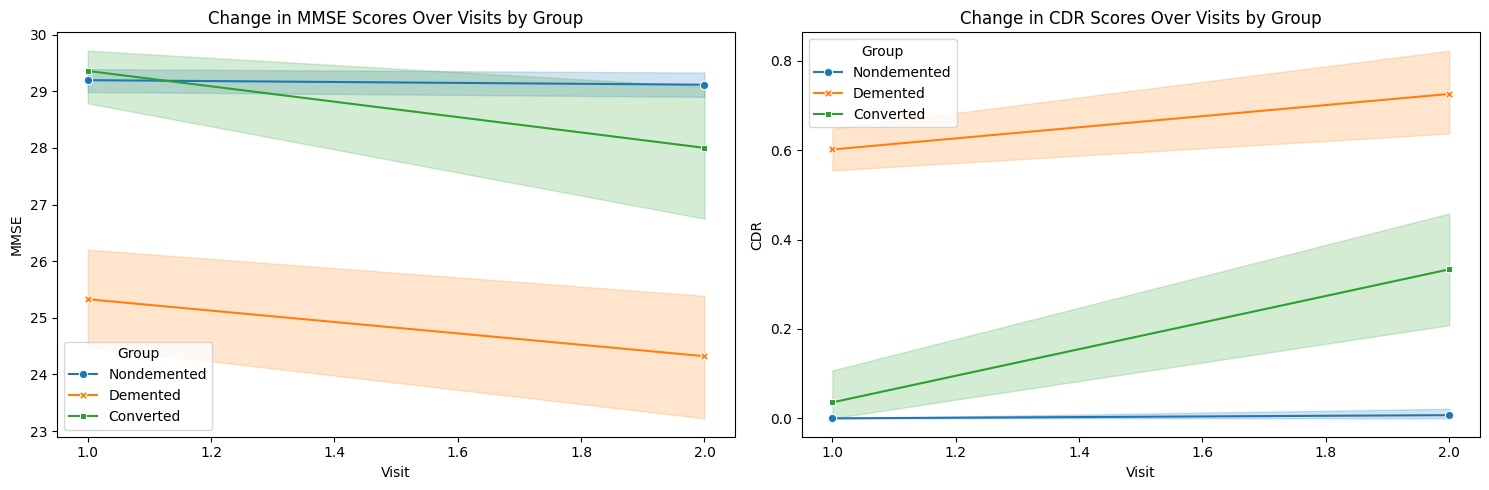

In [21]:
# Line Graphs for Cognitive Scores Over Time

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot MMSE scores over visits by group
sns.lineplot(ax=axes[0], x='Visit', y='MMSE', hue='Group', style='Group', markers=True, dashes=False, data=dt)
axes[0].set_title('Change in MMSE Scores Over Visits by Group')

# Plot CDR scores over visits by group
sns.lineplot(ax=axes[1], x='Visit', y='CDR', hue='Group', style='Group', markers=True, dashes=False, data=dt)
axes[1].set_title('Change in CDR Scores Over Visits by Group')

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:

# Model 1: MMSE ~ Group * Visit + (1|Subject ID)
# Convert Visit to categorical for interaction term
dt['Visit'] = dt['Visit'].astype('category')

model_1 = smf.mixedlm("MMSE ~ Group * Visit", dt, groups=dt["Subject ID"], re_formula="~Visit")
result_1 = model_1.fit()

# Model 2: CDR ~ Group * Visit + (1|Subject ID)
model_2 = smf.mixedlm("CDR ~ Group * Visit", dt, groups=dt["Subject ID"], re_formula="~Visit")
result_2 = model_2.fit()

# Display the summaries of both models
result_1_summary = result_1.summary()
result_2_summary = result_2.summary()

result_1_summary, result_2_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


(<class 'statsmodels.iolib.summary2.Summary'>
 """
                   Mixed Linear Model Regression Results
 Model:                   MixedLM       Dependent Variable:       MMSE     
 No. Observations:        294           Method:                   REML     
 No. Groups:              150           Scale:                    1.6437   
 Min. group size:         1             Log-Likelihood:           -654.4033
 Max. group size:         2             Converged:                Yes      
 Mean group size:         2.0                                              
 --------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
 --------------------------------------------------------------------------
 Intercept                       29.357    0.606 48.418 0.000 28.169 30.546
 Group[T.Demented]               -4.029    0.669 -6.019 0.000 -5.341 -2.717
 Group[T.Nondemented]            -0.163    0.663 -0.246 

In [14]:
# Shapiro-Wilk test for MMSE scores
shapiro_results_mmse = shapiro(dt['MMSE'])
print("Shapiro-Wilk Test for MMSE Normality:", shapiro_results_mmse)

# Levene's test for CDR scores between groups
levene_results_cdr = levene(dt[dt['Group'] == 'Nondemented']['CDR'], dt[dt['Group'] == 'Demented']['CDR'])
print("Levene's Test for CDR Homogeneity of Variances:", levene_results_cdr)

Shapiro-Wilk Test for MMSE Normality: ShapiroResult(statistic=0.7695115208625793, pvalue=4.9702656063631724e-20)
Levene's Test for CDR Homogeneity of Variances: LeveneResult(statistic=38.57985160099451, pvalue=2.014775720504109e-09)


In [15]:

# Prepare data
predict_data = pd.DataFrame({
    'Group': ['Demented', 'Nondemented', 'Demented', 'Nondemented'],
    'Visit': [1, 1, 2, 2]
})

# Convert 'Visit' to category to match model data
predict_data['Visit'] = predict_data['Visit'].astype('category')

# Predict MMSE for each group and visit combination using Model 1
predict_data['MMSE_predicted'] = result_1.predict(predict_data)

# Predict CDR for each group and visit combination using Model 2
predict_data['CDR_predicted'] = result_2.predict(predict_data)

# Display the predicted values
print(predict_data)

# Difference in predicted MMSE and CDR scores between groups at each visit
for visit in [1, 2]:
    mmse_diff = predict_data.loc[(predict_data['Visit'] == visit) & (predict_data['Group'] == 'Demented'), 'MMSE_predicted'].values[0] - \
                predict_data.loc[(predict_data['Visit'] == visit) & (predict_data['Group'] == 'Nondemented'), 'MMSE_predicted'].values[0]

    cdr_diff = predict_data.loc[(predict_data['Visit'] == visit) & (predict_data['Group'] == 'Demented'), 'CDR_predicted'].values[0] - \
               predict_data.loc[(predict_data['Visit'] == visit) & (predict_data['Group'] == 'Nondemented'), 'CDR_predicted'].values[0]

    print(f"Visit {visit}: MMSE difference (Demented - Nondemented) = {mmse_diff}")
    print(f"Visit {visit}: CDR difference (Demented - Nondemented) = {cdr_diff}")


         Group Visit  MMSE_predicted  CDR_predicted
0     Demented     1       25.328125   6.015625e-01
1  Nondemented     1       29.194444   8.326673e-17
2     Demented     2       24.413736   7.227435e-01
3  Nondemented     2       29.122063   7.142857e-03
Visit 1: MMSE difference (Demented - Nondemented) = -3.8663194444444287
Visit 1: CDR difference (Demented - Nondemented) = 0.6015624999999998
Visit 2: MMSE difference (Demented - Nondemented) = -4.708327598497789
Visit 2: CDR difference (Demented - Nondemented) = 0.7156006298807728


# #**Q2**#
**How do demographic and socioeconomic factors influence the rate of cognitive decline in individuals with dementia compared to those without dementia?**
(Not in Narrative due to page limit)

H0: Demographic and socioeconomic factors do not significantly influence the rate of cognitive decline in individuals with dementia compared to those without dementia.

H1: Demographic and socioeconomic factors significantly influence the rate of cognitive decline in individuals with dementia compared to those without dementia.

Text(0.5, 1.0, 'SES and MMSE Interaction by Group')

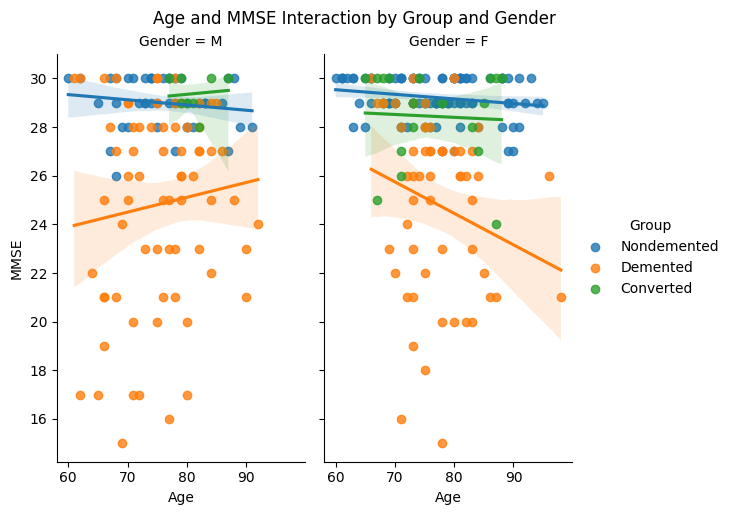

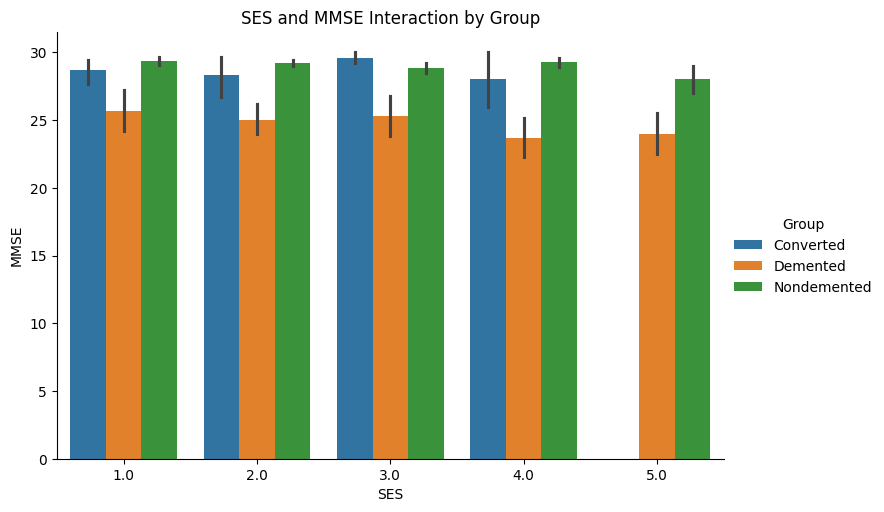

In [16]:
# Rename the 'M/F' column to avoid confusion
dt.rename(columns={'M/F': 'Gender'}, inplace=True)

# Age and MMSE Interaction Plot
sns.lmplot(x='Age', y='MMSE', hue='Group', col='Gender', data=dt, aspect=0.6, height=5)
plt.suptitle('Age and MMSE Interaction by Group and Gender', y=1.02)

# SES and MMSE Interaction Plot
sns.catplot(x='SES', y='MMSE', hue='Group', kind='bar', data=dt, aspect=1.5, height=5)
plt.title('SES and MMSE Interaction by Group')


In [17]:
# Adjusted Model Formulas with Renamed Gender Column
# Model 3: Influence of demographic and socioeconomic factors on MMSE
model_3_formula = "MMSE ~ Group * Visit + Age + EDUC + C(Gender) + SES"
model_3 = smf.mixedlm(model_3_formula, dt, groups=dt["Subject ID"])
result_3 = model_3.fit()
print(result_3.summary())

# Model 4: Similar to Model 3, but with CDR scores as the dependent variable
model_4_formula = "CDR ~ Group * Visit + Age + EDUC + C(Gender) + SES"
model_4 = smf.mixedlm(model_4_formula, dt, groups=dt["Subject ID"])
result_4 = model_4.fit()
print(result_4.summary())


                  Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       MMSE     
No. Observations:        294           Method:                   REML     
No. Groups:              150           Scale:                    2.5539   
Min. group size:         1             Log-Likelihood:           -668.0262
Max. group size:         2             Converged:                Yes      
Mean group size:         2.0                                              
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                       31.407    2.981 10.534 0.000 25.563 37.251
Group[T.Demented]               -3.795    0.814 -4.663 0.000 -5.390 -2.200
Group[T.Nondemented]             0.028    0.795  0.035 0.972 -1.529  1.585
Visit[T.2]                      -1.315    0.

In [18]:
# Assumption Checks: Normality (Shapiro-Wilk) and Homogeneity of Variances (Levene's Test)
# Checking normality for MMSE scores
shapiro_results_mmse = shapiro(dt['MMSE'].dropna())
print("Shapiro-Wilk Test for MMSE Normality:", shapiro_results_mmse)

# Checking homogeneity of variances for MMSE scores between groups
levene_results_mmse = levene(dt[dt['Group'] == 'Nondemented']['MMSE'], dt[dt['Group'] == 'Demented']['MMSE'])
print("Levene's Test for MMSE Homogeneity of Variances:", levene_results_mmse)

Shapiro-Wilk Test for MMSE Normality: ShapiroResult(statistic=0.7695115208625793, pvalue=4.9702656063631724e-20)
Levene's Test for MMSE Homogeneity of Variances: LeveneResult(statistic=121.84035268122899, pvalue=1.4304163651723412e-23)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
  Converted_1   Converted_2  -1.3571 0.7893 -4.3708  1.6565  False
  Converted_1    Demented_1   -4.029    0.0 -6.2892 -1.7688   True
  Converted_1    Demented_2  -5.0346    0.0 -7.3013 -2.7678   True
  Converted_1 Nondemented_1  -0.1627 0.9999 -2.4003  2.0749  False
  Converted_1 Nondemented_2  -0.2429 0.9996 -2.4856  1.9999  False
  Converted_2    Demented_1  -2.6719   0.02 -5.0817 -0.2621   True
  Converted_2    Demented_2  -3.6774 0.0003 -6.0934 -1.2615   True
  Converted_2 Nondemented_1   1.1944 0.7058 -1.1941   3.583  False
  Converted_2 Nondemented_2   1.1143 0.7649 -1.2792  3.5077  False
   Demented_1    Demented_2  -1.0055 0.2833 -2.3706  0.3595  False
   Demented_1 Nondemented_1   3.8663    0.0  2.5503  5.1824   True
   Demented_1 Nondemented_2   3.7862    0.0  2.4613   5.111   

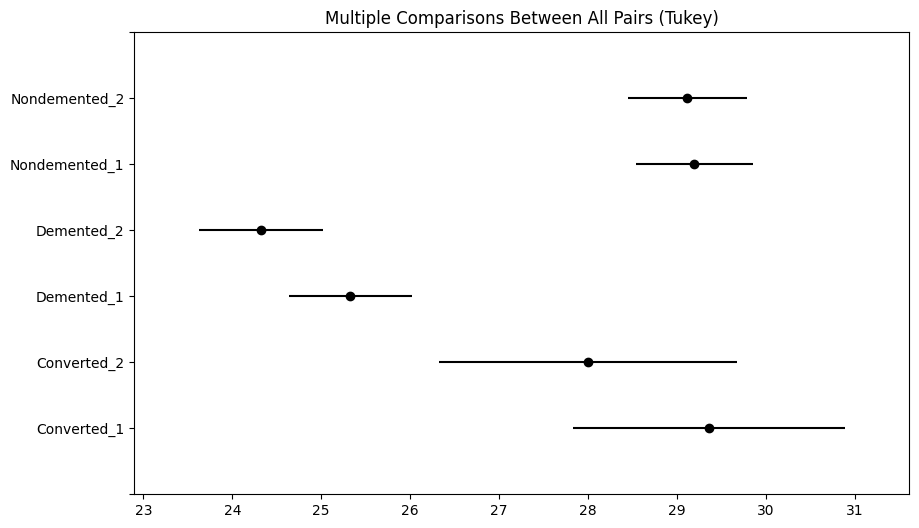

In [19]:

# Creating a combined group identifier for interaction between 'Group' and 'Visit' for post hoc analysis
dt['Group_Visit'] = dt['Group'] + "_" + dt['Visit'].astype(str)

# Tukey's HSD test for MMSE scores across different 'Group_Visit' combinations
tukey_result = pairwise_tukeyhsd(endog=dt['MMSE'], groups=dt['Group_Visit'], alpha=0.05)
print(tukey_result)

# Plotting the results
tukey_result.plot_simultaneous()
plt.show()

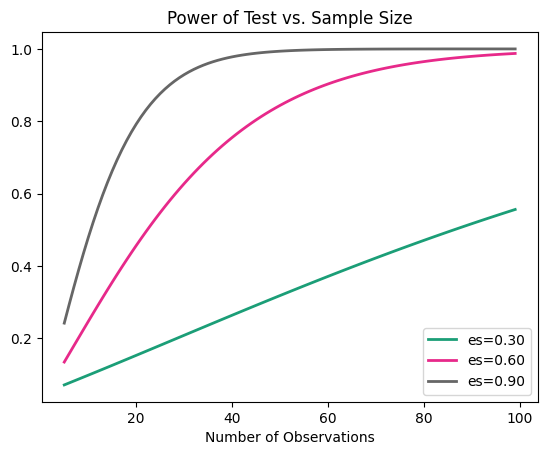

Sample Size: 45.451


In [20]:
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# Parameters for the power analysis
effect_size = 0.7  # large effect size
alpha = 0.05  # significance level
power = 0.91  # desired power

# Create power analysis object
analysis = TTestIndPower()

# Calculate sample size
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)

# Round the sample size to 3 decimal places
sample_size_rounded = round(sample_size, 3)

# Generate and plot the power analysis
fig = analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(5, 100),
                          effect_size=np.array([0.3, 0.6, 0.9]),
                          alpha=alpha)
plt.title('Power of Test vs. Sample Size')
plt.show()

# Print the rounded sample size
print("Sample Size:", sample_size_rounded)
